In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## MLRM
#### Weather dataset
#### Importing dataset

Since data is in form of csv file we have to use pandas read_csv to load the data

Check to see if there are any null values. If it's present, you can do the following:

In sklearn, data is imputed using the Imputation method.

The fillna() method is used to fill NaN values with the mean, median, and mode.

Describe data so that statistical analysis can be performed.

In [2]:
weather=pd.read_csv("weatherHistory.csv")
weather.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
type(weather['Formatted Date'])


pandas.core.series.Series

In [4]:
df=weather.copy()
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
#checking missing values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.Summary.unique()
df.Summary.value_counts()

Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [8]:
df.dropna(inplace=True)

In [9]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### YEAR-WISE ANALYSIS

- From description we can see that Formatted Date is a object data type,
  Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction
- For this we require  pd.to_datetime to convert object data type to datetime dtype.

In [10]:
#converting time to utc format
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc= True)
df['Formatted Date'].head()

0   2006-03-31 22:00:00+00:00
1   2006-03-31 23:00:00+00:00
2   2006-04-01 00:00:00+00:00
3   2006-04-01 01:00:00+00:00
4   2006-04-01 02:00:00+00:00
Name: Formatted Date, dtype: datetime64[ns, UTC]

In [11]:
year_data= df[['Apparent Temperature (C)','Humidity','Visibility (km)','Wind Speed (km/h)','Pressure (millibars)']].set_index(df['Formatted Date'])
year_data.head()

,Apparent Temperature (C),Humidity,Visibility (km),Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-03-31 22:00:00+00:00,7.388889,0.89,15.8263,14.1197,1015.13
2006-03-31 23:00:00+00:00,7.227778,0.86,15.8263,14.2646,1015.63
2006-04-01 00:00:00+00:00,9.377778,0.89,14.9569,3.9284,1015.94
2006-04-01 01:00:00+00:00,5.944444,0.83,15.8263,14.1036,1016.41
2006-04-01 02:00:00+00:00,6.977778,0.83,15.8263,11.0446,1016.51


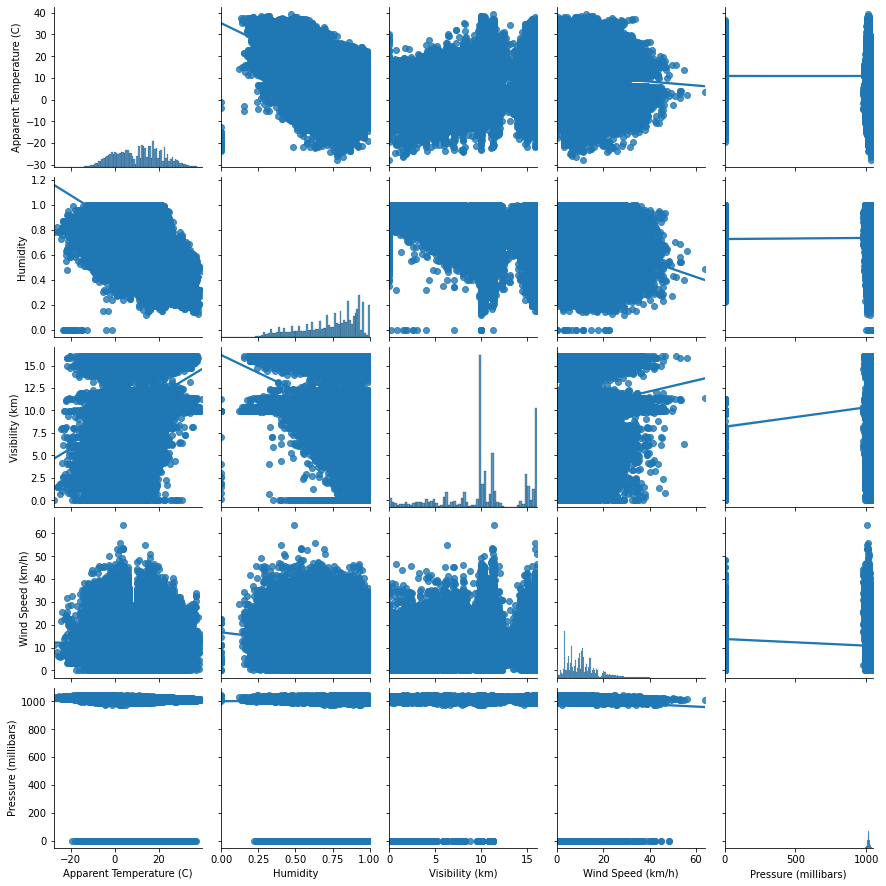

In [12]:
# Pair plot for correlation
sns.pairplot(year_data, kind='reg')
plt.show()

In [13]:
#normalizing year data

normal_data = (year_data - year_data.min())/ (year_data.max() - year_data.min())
normal_data.head()

,Apparent Temperature (C),Humidity,Visibility (km),Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-03-31 22:00:00+00:00,0.523486,0.89,0.983,0.221130,0.970135
2006-03-31 23:00:00+00:00,0.521084,0.86,0.983,0.223399,0.970613
2006-04-01 00:00:00+00:00,0.553144,0.89,0.929,0.061523,0.970909
2006-04-01 01:00:00+00:00,0.501947,0.83,0.983,0.220877,0.971358
2006-04-01 02:00:00+00:00,0.517356,0.83,0.983,0.172970,0.971454


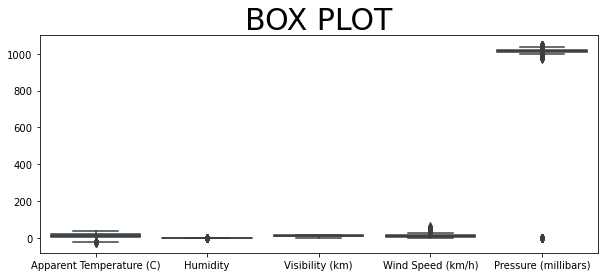

In [14]:
#Box Plot before normalization
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = year_data)
plt.show()

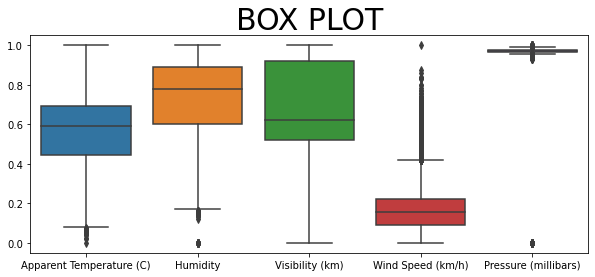

In [15]:
#Box Plot After normalization
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = normal_data)
plt.show()

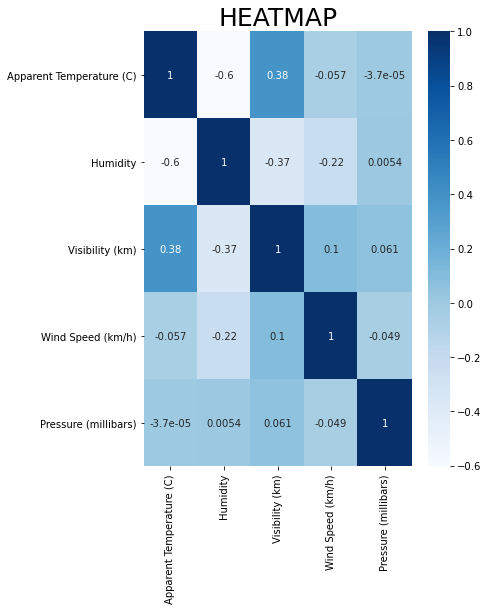

In [16]:
# Heatmap before normalization
plt.figure(figsize=(6,8))
plt.title('HEATMAP', fontsize=25)
sns.heatmap(year_data.corr(), annot=True, cmap='Blues')
plt.show()

In [17]:
monthly_data= df[['Temperature (C)','Humidity']].set_index(df['Formatted Date'])
monthly_data.head()

,Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,9.472222,0.89
2006-03-31 23:00:00+00:00,9.355556,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,8.288889,0.83
2006-04-01 02:00:00+00:00,8.755556,0.83


<AxesSubplot:title={'center':'Temperature vs Humidity'}, xlabel='Temperature (C)', ylabel='Humidity'>

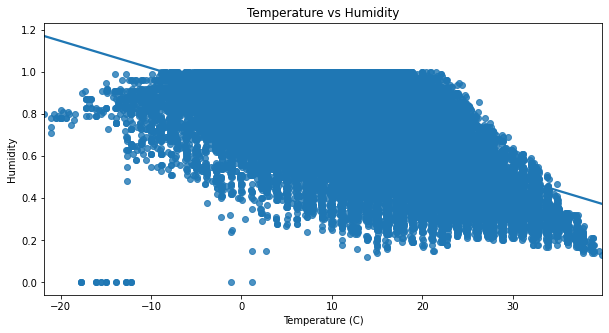

In [18]:
# Regression plot for Temperature & Humidity
plt.figure(figsize=(10,5))
plt.title('Temperature vs Humidity')
sns.regplot(x=df["Temperature (C)"], y=df["Humidity"])

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


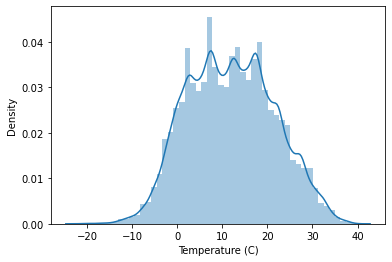

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


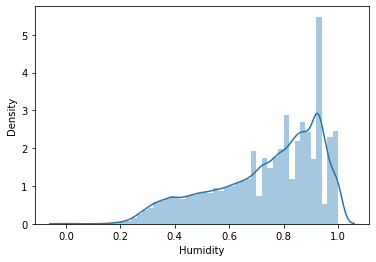

In [19]:
# Distplot for Apparent Temperature & Humidity
sns.distplot(monthly_data['Temperature (C)'])
plt.show()
sns.distplot(monthly_data['Humidity'])
plt.show()

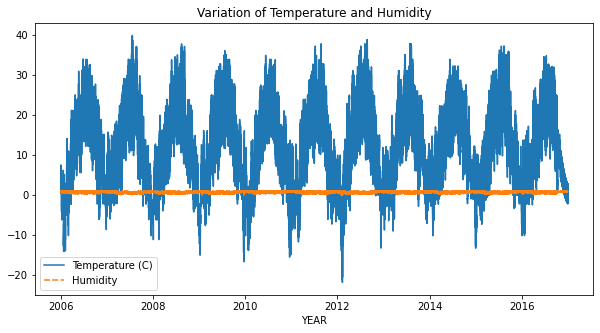

In [20]:
plt.figure(figsize=(10,5))
plt.xlabel('YEAR')
plt.title('Variation of Temperature and Humidity')
sns.lineplot(data=monthly_data)
plt.show()

                 Temperature (C)  Humidity
Temperature (C)         1.000000 -0.632148
Humidity               -0.632148  1.000000


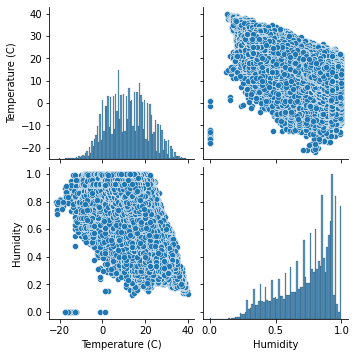

In [21]:
print(monthly_data.corr())
sns.pairplot(monthly_data, kind = 'scatter')
plt.show()

#### Before Normalization 

In [28]:
monthly_data.index.month

Int64Index([3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='Formatted Date', length=95936)

In [33]:
# Function for plotting Humidity & Apparent Temperature for all month
TEMP_DATA = monthly_data.iloc[:,0]
HUM_DATA = monthly_data.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'

def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,
                 label=label,
                 color=color,
                 marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.show()

In [34]:
# Function for plotting Apparent Temperature & Humidity for each month
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature & Humidity - {}'.format(label))
    plt.xlabel('YEAR')
    data = monthly_data[monthly_data.index.month == month]
    sns.lineplot(data=data, marker='o')
    plt.show()
    print(data.describe())
    sns.pairplot(data, kind='reg')
    plt.show()
    print('-'*80)


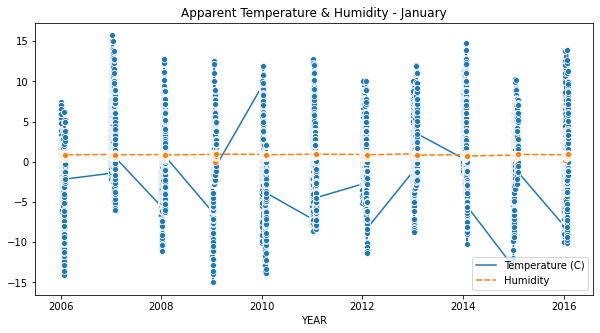

       Temperature (C)     Humidity
count      8184.000000  8184.000000
mean          0.815678     0.850698
std           4.878914     0.112176
min         -15.000000     0.000000
25%          -2.266667     0.780000
50%           1.038889     0.870000
75%           3.938889     0.930000
max          15.738889     1.000000


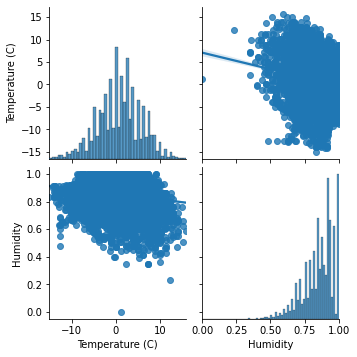

--------------------------------------------------------------------------------


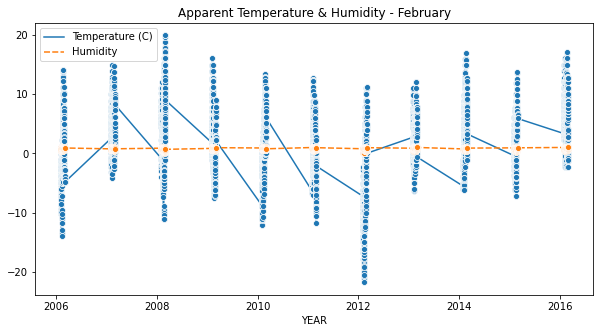

       Temperature (C)     Humidity
count      7464.000000  7464.000000
mean          2.166880     0.813407
std           5.618453     0.138060
min         -21.822222     0.000000
25%          -1.111111     0.750000
50%           2.222222     0.840000
75%           6.111111     0.920000
max          19.950000     1.000000


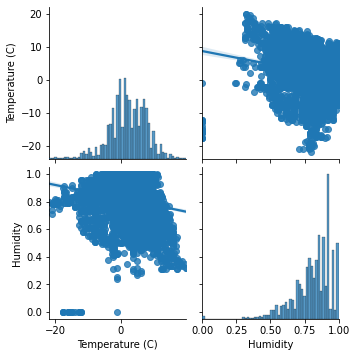

--------------------------------------------------------------------------------


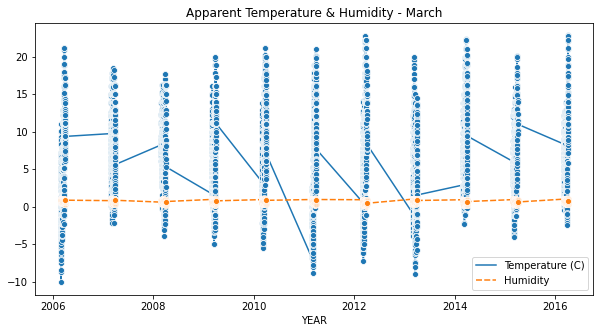

       Temperature (C)     Humidity
count      8184.000000  8184.000000
mean          6.914976     0.702849
std           5.460491     0.185740
min         -10.100000     0.120000
25%           2.838889     0.570000
50%           7.155556     0.730000
75%          10.286111     0.850000
max          22.822222     1.000000


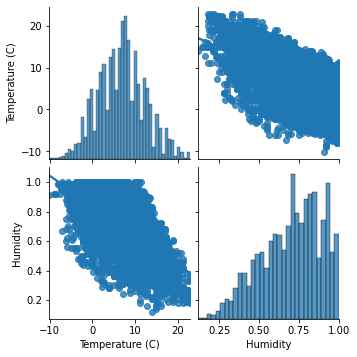

--------------------------------------------------------------------------------


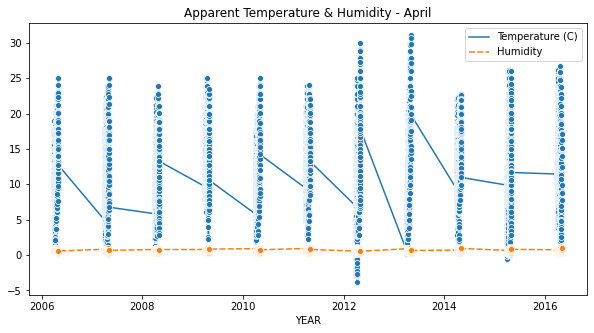

       Temperature (C)     Humidity
count      7842.000000  7842.000000
mean         12.774927     0.640416
std           5.521074     0.201407
min          -3.888889     0.150000
25%           8.777778     0.480000
50%          12.311111     0.660000
75%          17.016667     0.810000
max          31.061111     1.000000


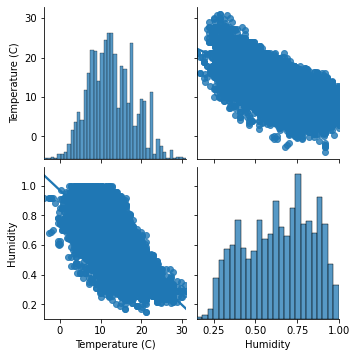

--------------------------------------------------------------------------------


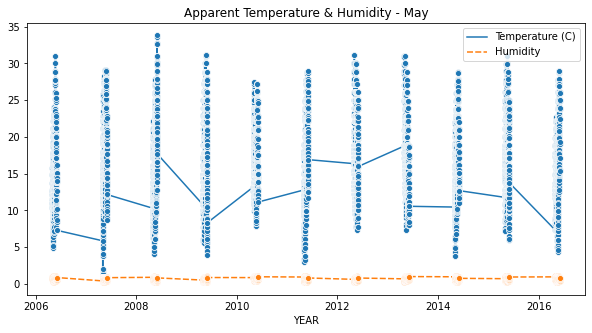

       Temperature (C)     Humidity
count      8119.000000  8119.000000
mean         16.876281     0.692102
std           5.346105     0.192541
min           1.361111     0.190000
25%          12.777778     0.530000
50%          16.161111     0.720000
75%          20.913889     0.860000
max          33.816667     1.000000


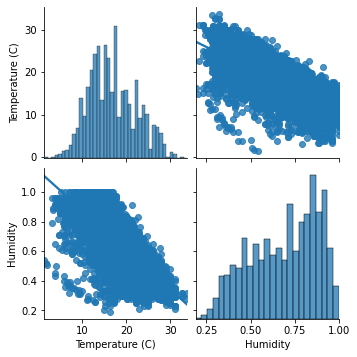

--------------------------------------------------------------------------------


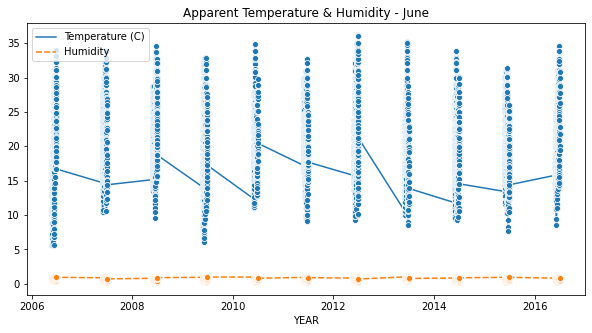

       Temperature (C)     Humidity
count      7920.000000  7920.000000
mean         20.728510     0.686418
std           5.599789     0.202636
min           5.577778     0.180000
25%          16.477778     0.520000
50%          20.072222     0.720000
75%          24.905556     0.870000
max          36.133333     1.000000


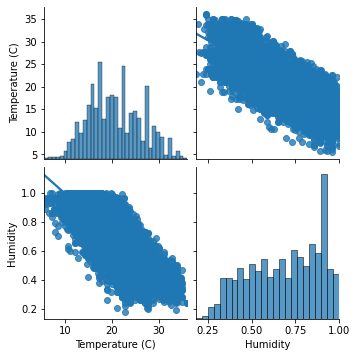

--------------------------------------------------------------------------------


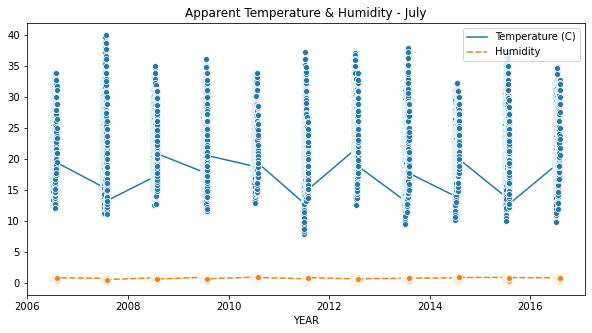

       Temperature (C)     Humidity
count      8181.000000  8181.000000
mean         22.965462     0.639593
std           5.737931     0.215791
min           7.950000     0.130000
25%          18.383333     0.450000
50%          22.311111     0.650000
75%          27.244444     0.830000
max          39.905556     1.000000


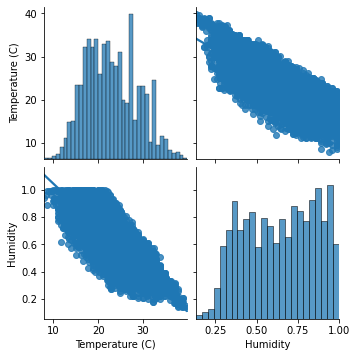

--------------------------------------------------------------------------------


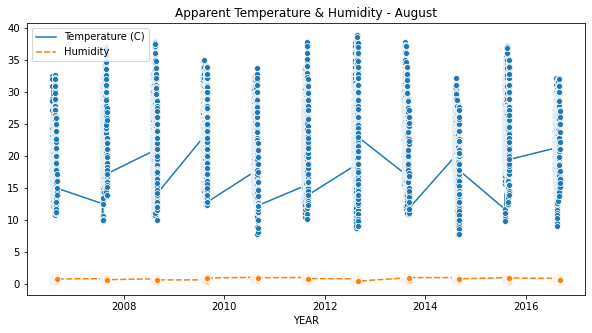

       Temperature (C)     Humidity
count      8208.000000  8208.000000
mean         22.339134     0.635300
std           5.905710     0.218718
min           7.711111     0.170000
25%          17.777778     0.450000
50%          21.919444     0.650000
75%          26.994444     0.830000
max          38.861111     1.000000


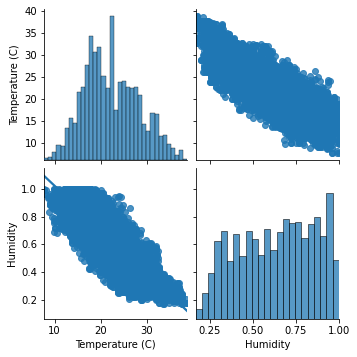

--------------------------------------------------------------------------------


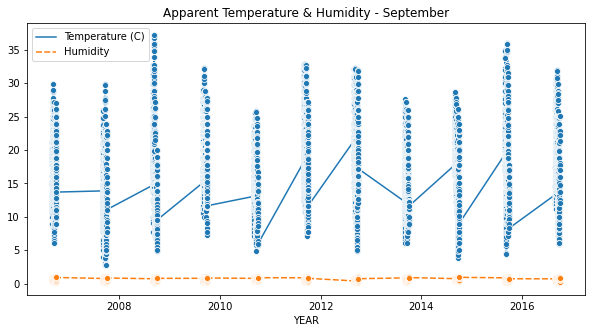

       Temperature (C)     Humidity
count      7920.000000  7920.000000
mean         17.503458     0.689163
std           5.770636     0.204277
min           2.761111     0.190000
25%          13.193056     0.530000
50%          17.155556     0.730000
75%          21.201389     0.860000
max          37.150000     1.000000


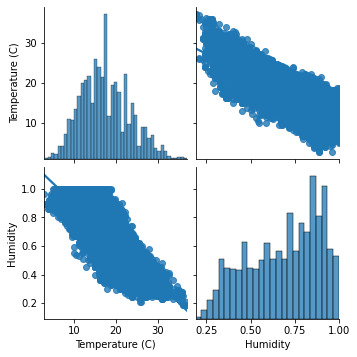

--------------------------------------------------------------------------------


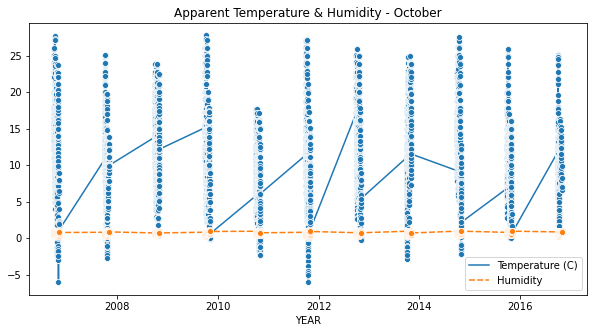

       Temperature (C)     Humidity
count      7845.000000  7845.000000
mean         11.432515     0.774790
std           5.481515     0.168972
min          -6.061111     0.200000
25%           7.755556     0.670000
50%          11.111111     0.820000
75%          14.883333     0.920000
max          27.777778     1.000000


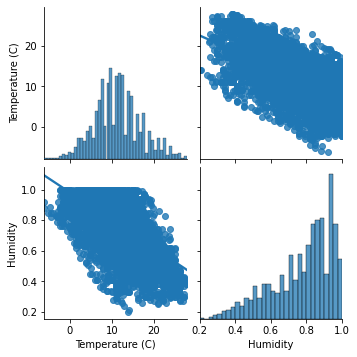

--------------------------------------------------------------------------------


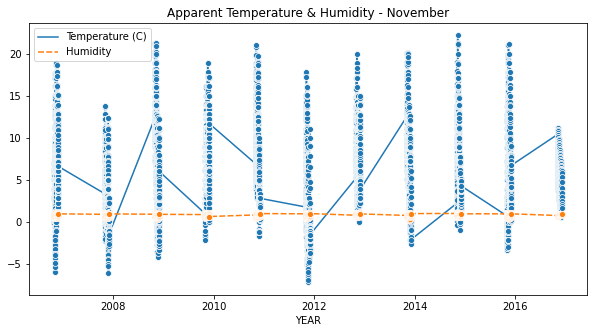

       Temperature (C)     Humidity
count      7885.000000  7885.000000
mean          6.582581     0.827858
std           4.863831     0.124300
min          -7.244444     0.150000
25%           2.894444     0.760000
50%           6.322222     0.850000
75%           9.816667     0.930000
max          22.188889     1.000000


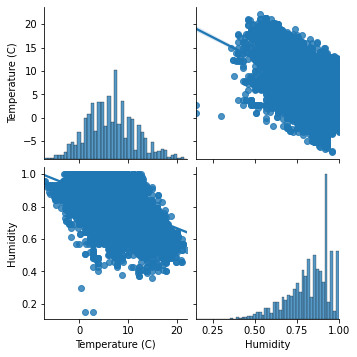

--------------------------------------------------------------------------------


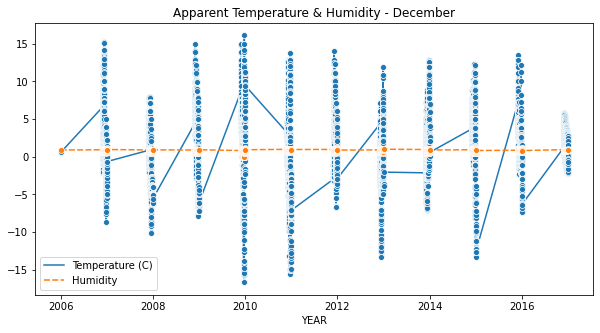

       Temperature (C)     Humidity
count      8184.000000  8184.000000
mean          1.625086     0.870398
std           4.670945     0.100593
min         -16.666667     0.000000
25%          -1.188889     0.820000
50%           1.775000     0.890000
75%           4.905556     0.930000
max          16.094444     1.000000


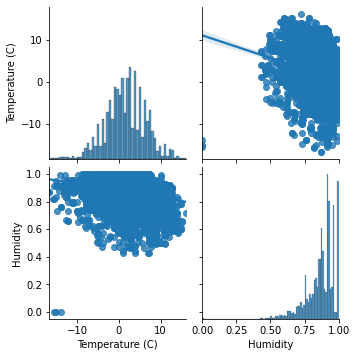

--------------------------------------------------------------------------------


In [35]:
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)

#### After Normalization

In [25]:
# Normalizing data
temp = monthly_data
normed_data = (temp - temp.min()) / (temp.max() - temp.min())
normed_data.head()

,Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,0.506975,0.89
2006-03-31 23:00:00+00:00,0.505085,0.86
2006-04-01 00:00:00+00:00,0.505445,0.89
2006-04-01 01:00:00+00:00,0.487805,0.83
2006-04-01 02:00:00+00:00,0.495365,0.83


In [36]:
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Temperature & Humidity - {}'.format(label))
    plt.xlabel('YEAR')
    data = normed_data[normed_data.index.month == month]
    sns.lineplot(data=data, marker='o')
    plt.show()
    sns.pairplot(data, kind='reg')
    plt.show()
    plt.title('Boxplot - {}'.format(label))
    sns.boxplot(data=data)
    plt.show()
    print('-'*80)

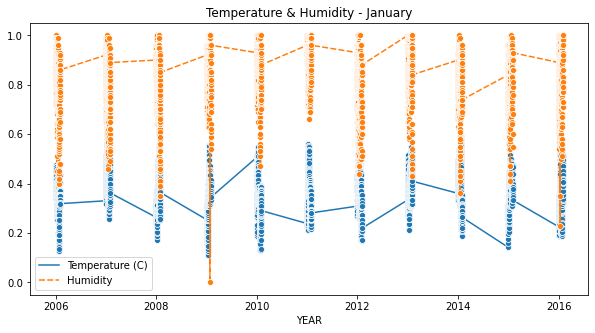

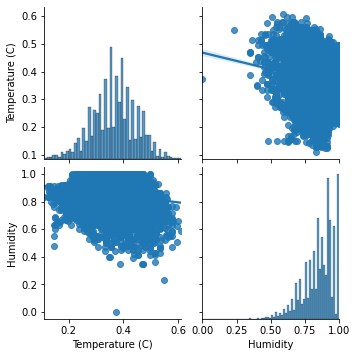

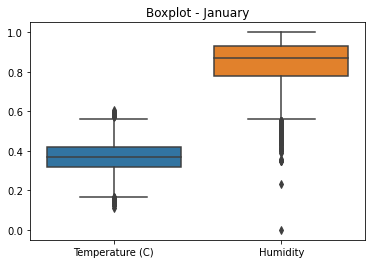

--------------------------------------------------------------------------------


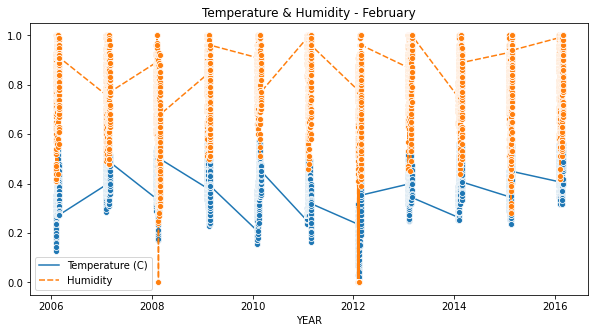

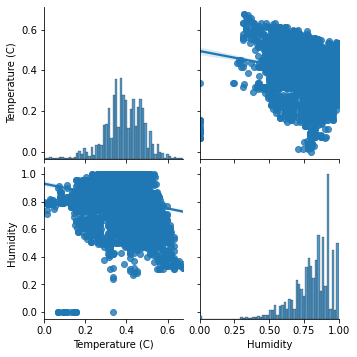

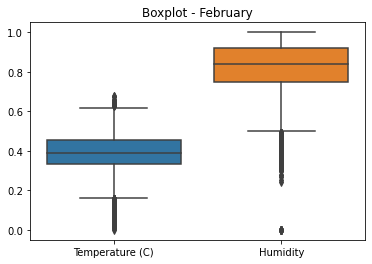

--------------------------------------------------------------------------------


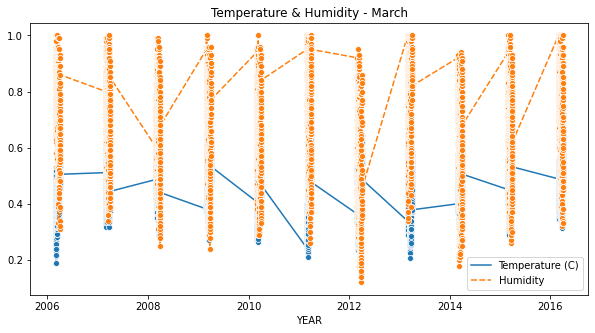

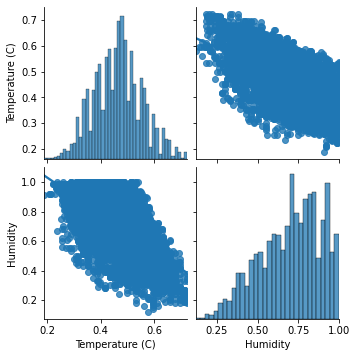

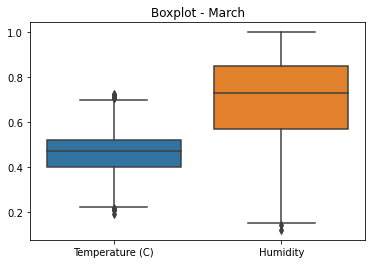

--------------------------------------------------------------------------------


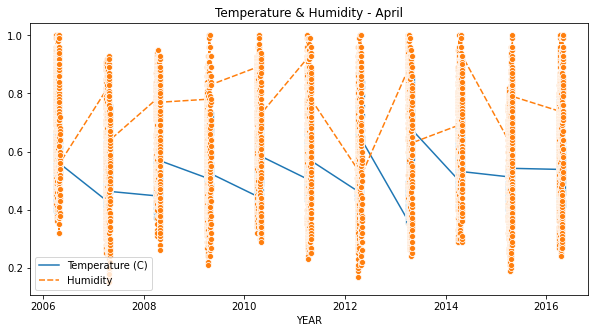

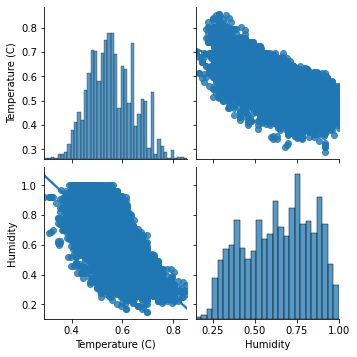

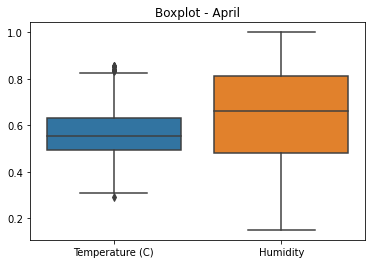

--------------------------------------------------------------------------------


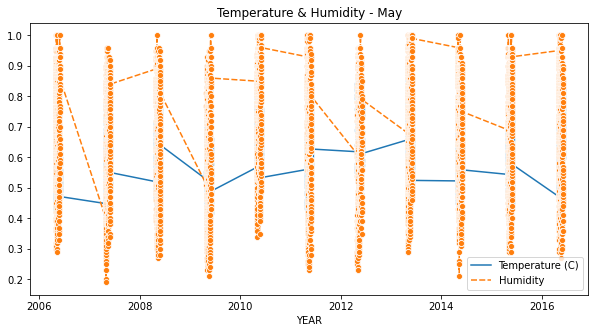

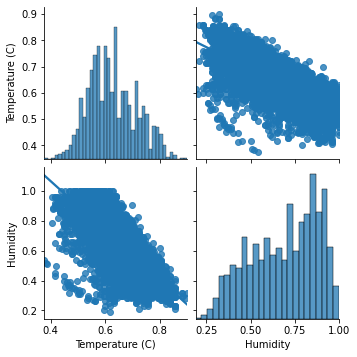

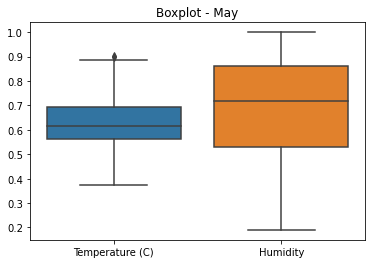

--------------------------------------------------------------------------------


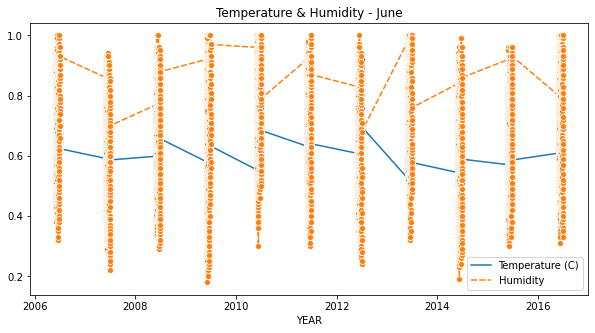

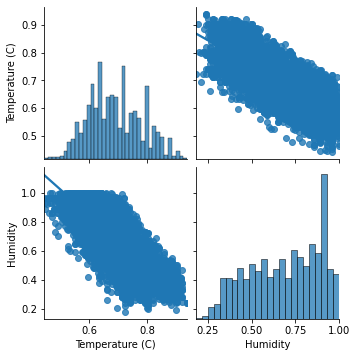

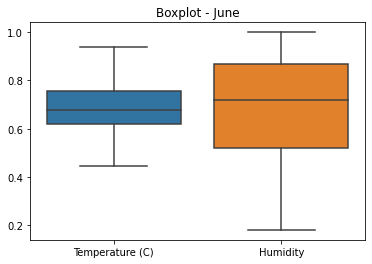

--------------------------------------------------------------------------------


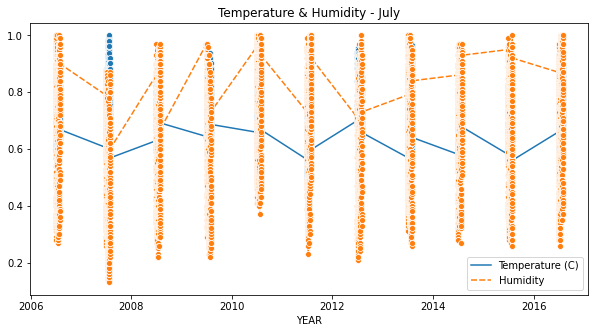

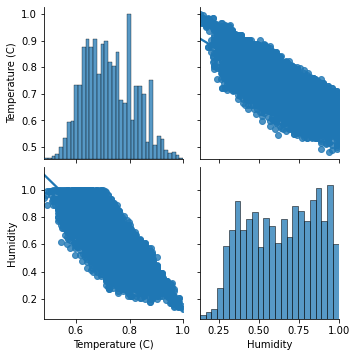

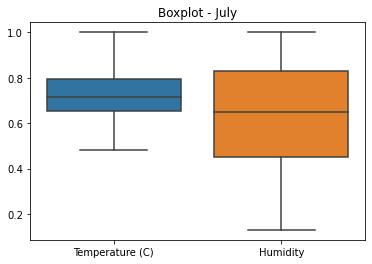

--------------------------------------------------------------------------------


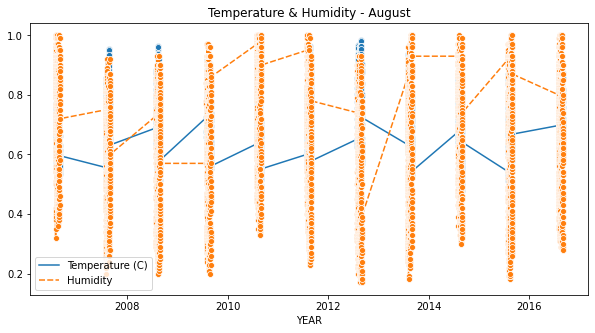

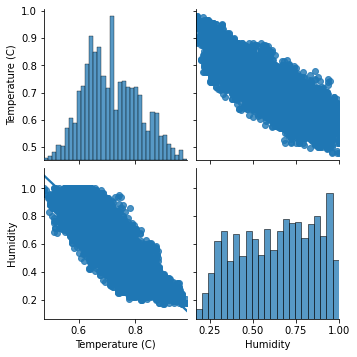

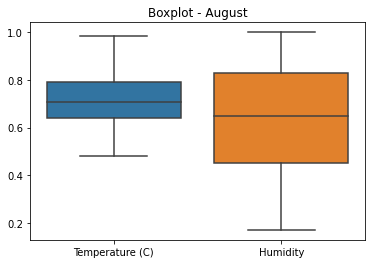

--------------------------------------------------------------------------------


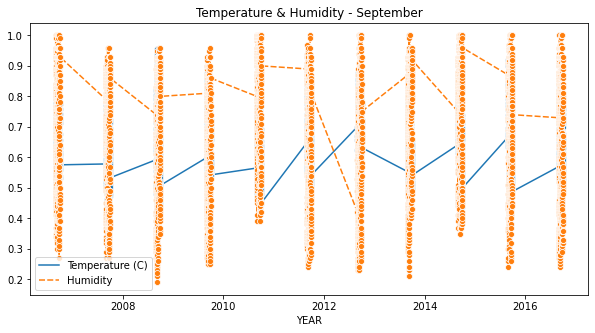

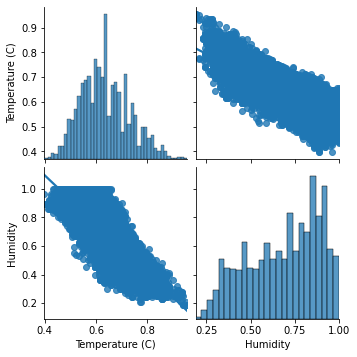

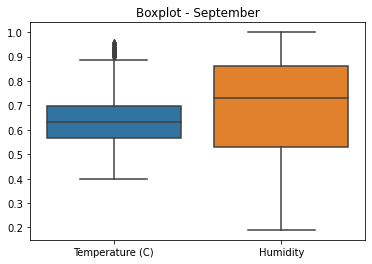

--------------------------------------------------------------------------------


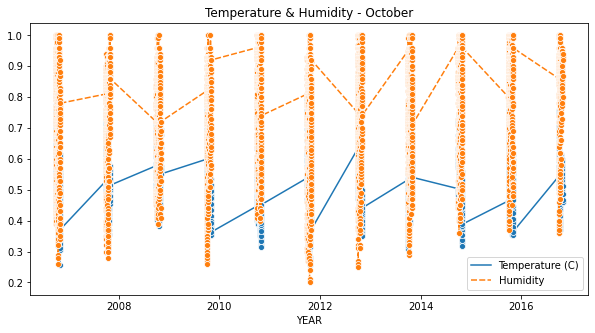

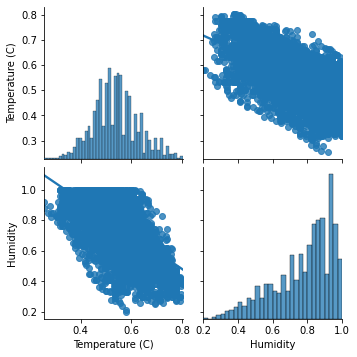

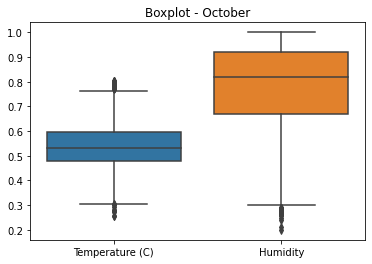

--------------------------------------------------------------------------------


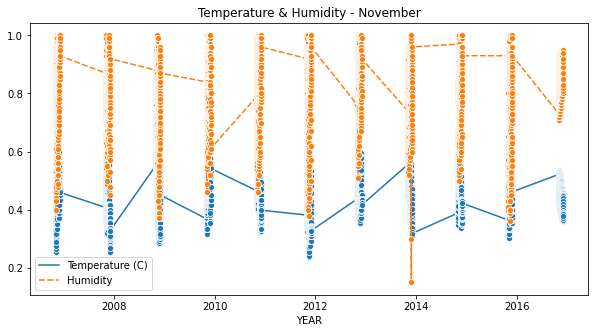

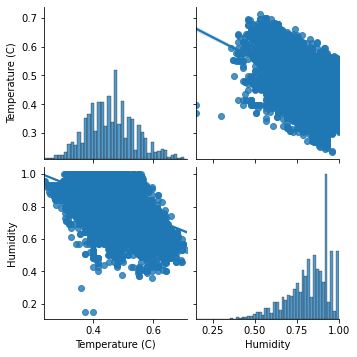

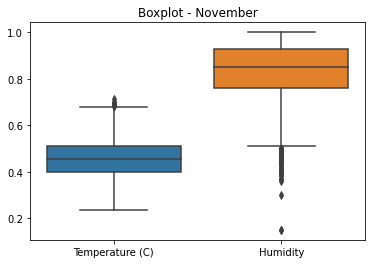

--------------------------------------------------------------------------------


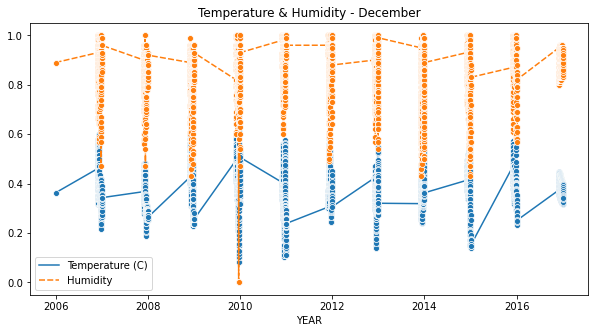

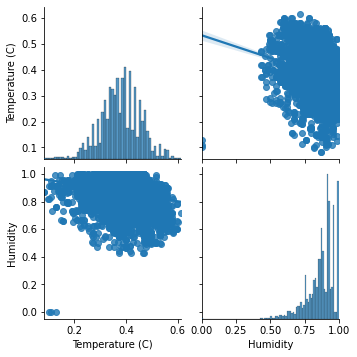

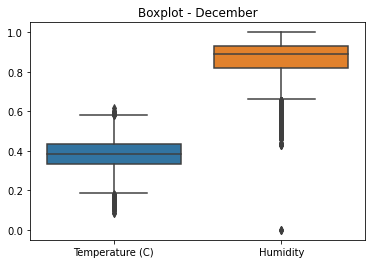

--------------------------------------------------------------------------------


In [37]:
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)

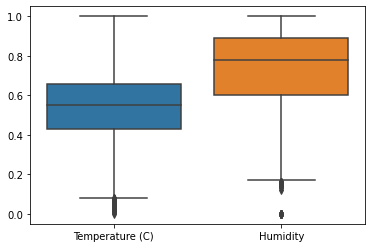

In [38]:
sns.boxplot(data=normed_data)
plt.show()

<AxesSubplot:title={'center':'Temperature vs Humidity'}, xlabel='Temperature (C)', ylabel='Humidity'>

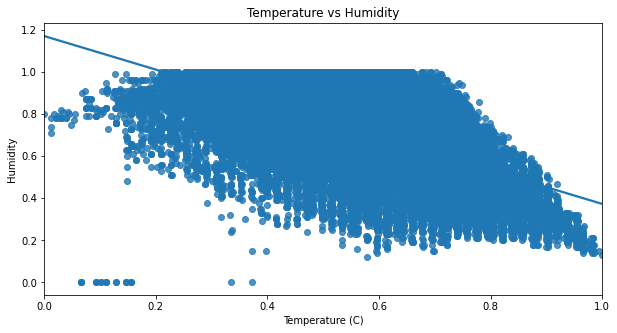

In [39]:
# Regression plot for Temperature & Humidity after normalization
plt.figure(figsize=(10,5))
plt.title('Temperature vs Humidity')
sns.regplot(x=normed_data["Temperature (C)"], y=normed_data["Humidity"])

## We will do Feature Engineering

- From description we can see that Formatted Date is a object data type,
  Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction
- For this we require  pd.to_datetime to convert object data type to datetime dtype.

- .dt.month method will extract only month of that date

In [40]:

df['month']=df['Formatted Date'].dt.month
print(df['month'])

0        3
1        3
2        4
3        4
4        4
        ..
96448    9
96449    9
96450    9
96451    9
96452    9
Name: month, Length: 95936, dtype: int64


In [41]:
#Here we are droing the useless columns
df.drop(["Formatted Date","Loud Cover","Daily Summary"],axis=1,inplace=True) 
#Loud cover has constant feature 
#and daily summary column has too many unique values and from date fomrmatted alredy extracted months

## Checking for outliers
### M-1: Boxplot
### M-2: Z_score
### M-3: IQR
steps:
Sort the dataset in ascending order.
calculate the 1st and 3rd quartiles(Q1, Q3).
compute IQR=Q3-Q1.
compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)

{'whiskers': [<matplotlib.lines.Line2D at 0x26007b4e7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x26007b4e9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26007b4e250>],
 'medians': [<matplotlib.lines.Line2D at 0x260095771c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x260095778b0>],
 'means': []}

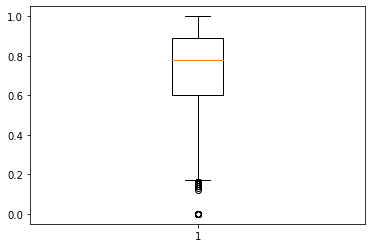

In [42]:

plt.boxplot(df['Humidity'])

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

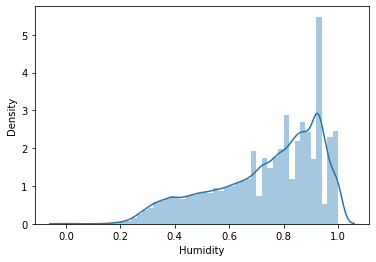

In [43]:
sns.distplot(df['Humidity'])

 Since the column Humidity of weather dataframe is not normally distributed, it is left skewed

In [44]:
df.Humidity.describe()

count    95936.000000
mean         0.734841
std          0.195724
min          0.000000
25%          0.600000
50%          0.780000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64

#### Method 1: to identify the outliers , if distribution is not gaussian distribution

In [45]:
#We will do with IQR
IQR= df.Humidity.quantile(0.75)-df.Humidity.quantile(0.25)
IQR

0.29000000000000004

In [46]:
Upper_bound= df.Humidity.quantile(0.75)+(1.5*IQR)
lower_bound= df.Humidity.quantile(0.25)-(1.5*IQR)
print(Upper_bound),print(lower_bound)

1.3250000000000002
0.16499999999999992


(None, None)


z_score = (Xi-mean)/std
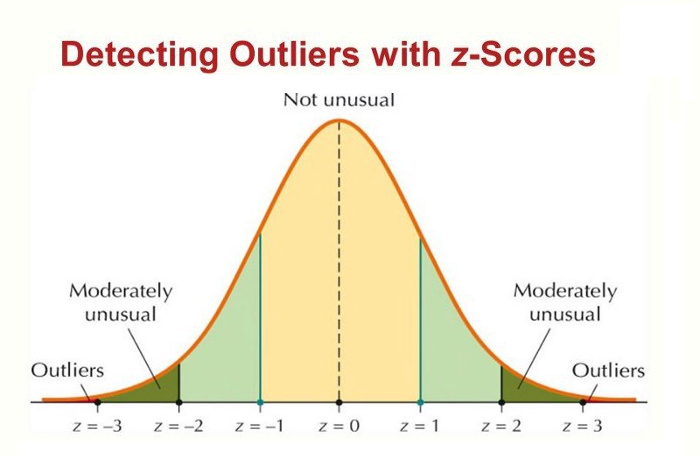


 #### Method-: 2: TO identify the outliers:
 If it is Gaussian Distribution!
 


In [47]:
#Lets check with std
u_b=df['Humidity'].mean()+3*df['Humidity'].std()
l_b=df['Humidity'].mean()-3*df['Humidity'].std()
print(u_b), print(l_b)

1.3220132954499055
0.14766857579750303


(None, None)

{'whiskers': [<matplotlib.lines.Line2D at 0x260044aa370>,
 'caps': [<matplotlib.lines.Line2D at 0x260044aaee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x260044bfac0>],
 'medians': [<matplotlib.lines.Line2D at 0x260044aa430>],
 'fliers': [<matplotlib.lines.Line2D at 0x26005dee280>],
 'means': []}

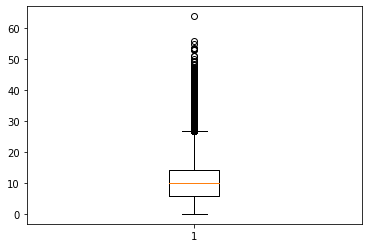

In [48]:
plt.boxplot(df['Wind Speed (km/h)'])

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Speed (km/h)', ylabel='Density'>

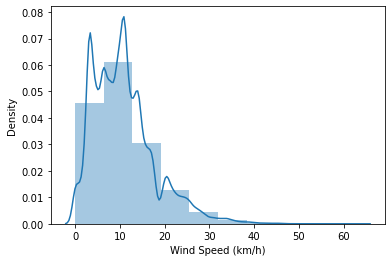

In [49]:
sns.distplot(df['Wind Speed (km/h)'], bins=10)

In [50]:
df['Wind Speed (km/h)'].describe()

count    95936.000000
mean        10.804936
std          6.920727
min          0.000000
25%          5.796000
50%          9.933700
75%         14.135800
max         63.852600
Name: Wind Speed (km/h), dtype: float64

In [51]:
#We will do with IQR
IQR= df['Wind Speed (km/h)'].quantile(0.75)-df['Wind Speed (km/h)'].quantile(0.25)
Upper_bound= df['Wind Speed (km/h)'].quantile(0.75)+(1.5*IQR)
lower_bound= df['Wind Speed (km/h)'].quantile(0.25)-(1.5*IQR)
print(Upper_bound),print(lower_bound)

26.6455
-6.7137


(None, None)

In [52]:
#Extreme boundries 
IQR= df['Wind Speed (km/h)'].quantile(0.75)-df['Wind Speed (km/h)'].quantile(0.25)
Upper_bound= df['Wind Speed (km/h)'].quantile(0.75)+(3*IQR)
lower_bound= df['Wind Speed (km/h)'].quantile(0.25)-(3*IQR)
print(Upper_bound),print(lower_bound)

39.1552
-19.2234


(None, None)

{'whiskers': [<matplotlib.lines.Line2D at 0x26004425850>,
 'caps': [<matplotlib.lines.Line2D at 0x26004425f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x260044254c0>],
 'medians': [<matplotlib.lines.Line2D at 0x26005dab610>],
 'fliers': [<matplotlib.lines.Line2D at 0x26005dab970>],
 'means': []}

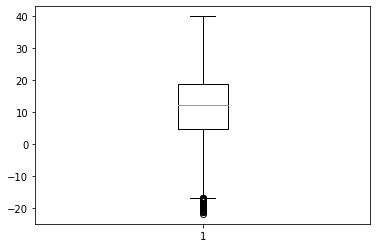

In [53]:
plt.boxplot(df['Temperature (C)'])

In [54]:
df['Temperature (C)'].describe()

count    95936.000000
mean        11.940976
std          9.570671
min        -21.822222
25%          4.604167
50%         12.033333
75%         18.844444
max         39.905556
Name: Temperature (C), dtype: float64

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature (C)', ylabel='Density'>

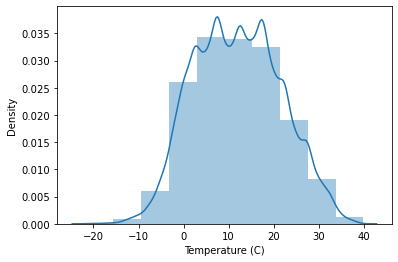

In [55]:
sns.distplot(df['Temperature (C)'], bins=10)

In [56]:
u_b=df['Temperature (C)'].mean()+3*df['Temperature (C)'].std()
l_b=df['Temperature (C)'].mean()-3*df['Temperature (C)'].std()
print(u_b), print(l_b)

40.65298762238014
-16.77103622885855


(None, None)

{'whiskers': [<matplotlib.lines.Line2D at 0x26005fb09d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26005fbb0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26005fb0670>],
 'medians': [<matplotlib.lines.Line2D at 0x26005fbb760>],
 'fliers': [<matplotlib.lines.Line2D at 0x26005fbba90>],
 'means': []}

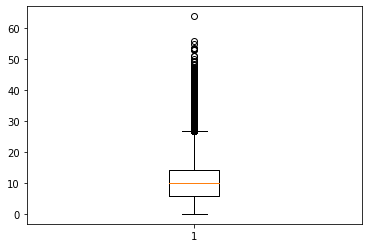

In [57]:
plt.boxplot(df['Wind Speed (km/h)'])

In [58]:
u_b=df['Wind Speed (km/h)'].mean()+3*df['Wind Speed (km/h)'].std()
l_b=df['Wind Speed (km/h)'].mean()-3*df['Wind Speed (km/h)'].std()
print(u_b), print(l_b)

31.56711806856684
-9.957246833578346


(None, None)

{'whiskers': [<matplotlib.lines.Line2D at 0x26009ba73a0>,
 'caps': [<matplotlib.lines.Line2D at 0x26004208d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x260098ae3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x260042cf100>],
 'fliers': [<matplotlib.lines.Line2D at 0x260042cfcd0>],
 'means': []}

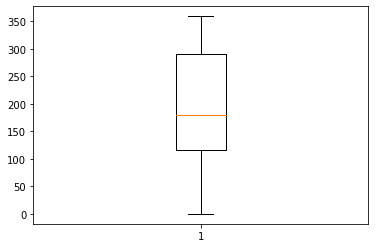

In [59]:
plt.boxplot(df['Wind Bearing (degrees)'])

#Not found

{'whiskers': [<matplotlib.lines.Line2D at 0x260062c8550>,
 'caps': [<matplotlib.lines.Line2D at 0x260062c8d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x260062c8f10>],
 'medians': [<matplotlib.lines.Line2D at 0x26008d9aeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26008d9ac40>],
 'means': []}

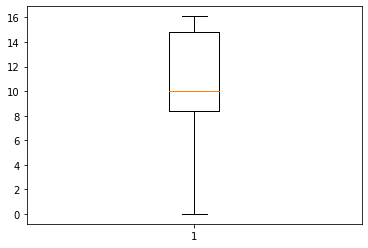

In [60]:
plt.boxplot(df['Visibility (km)'])
#Not found

{'whiskers': [<matplotlib.lines.Line2D at 0x26003eeca60>,
 'caps': [<matplotlib.lines.Line2D at 0x26008d8cca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26003eec250>],
 'medians': [<matplotlib.lines.Line2D at 0x26008d8c490>],
 'fliers': [<matplotlib.lines.Line2D at 0x26008d8cbe0>],
 'means': []}

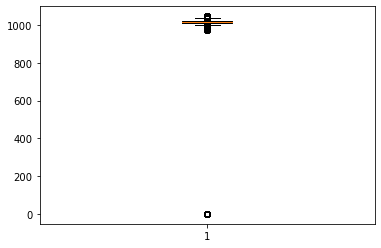

In [61]:
plt.boxplot(df['Pressure (millibars)'])

In [62]:
df['Pressure (millibars)'].describe()

count    95936.000000
mean      1003.150038
std        117.276976
min          0.000000
25%       1011.890000
50%       1016.420000
75%       1021.050000
max       1046.380000
Name: Pressure (millibars), dtype: float64

In [63]:
u_b=df['Pressure (millibars)'].mean()+3*df['Pressure (millibars)'].std()
l_b=df['Pressure (millibars)'].mean()-3*df['Pressure (millibars)'].std()
print(u_b), print(l_b)

1354.9809664148352
651.3191088437022


(None, None)

### Replace the outliers

In [64]:
df.loc[df["Humidity"]<0.165,"Humidity"]=0.165

{'whiskers': [<matplotlib.lines.Line2D at 0x2600d55d370>,
 'caps': [<matplotlib.lines.Line2D at 0x260060d89a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2600d55d1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x260060d80a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x260060d8e80>],
 'means': []}

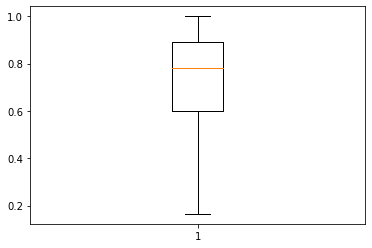

In [65]:
plt.boxplot(df.Humidity)

In [66]:
#sns.regplot(x=df["Temperature (C)"], y=df["Humidity"])

In [67]:
df.loc[df["Wind Speed (km/h)"]>26.5,"Wind Speed (km/h)"]=26.5

{'whiskers': [<matplotlib.lines.Line2D at 0x2600d625a60>,
 'caps': [<matplotlib.lines.Line2D at 0x260091db550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2600d6259d0>],
 'medians': [<matplotlib.lines.Line2D at 0x260091db940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2600b5b7670>],
 'means': []}

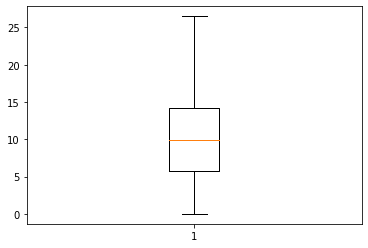

In [68]:
plt.boxplot(df["Wind Speed (km/h)"])

In [69]:

df.loc[df["Pressure (millibars)"]<652.4,"Pressure (millibars)"]=652.4

In [70]:
# checking for missing values
df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
month                       0
dtype: int64

In [71]:
# checking unique data in categorical feature
df['Precip Type'].unique()


array(['rain', 'snow'], dtype=object)

In [72]:
All=df.describe(include='all')# describes allnumerical and  categorical data
Cat=df.describe(include=['O'])# describes all  categorical data



In [73]:
# impute missing value 
df['Precip Type'].fillna(df['Precip Type'].mode()[0],inplace=True)


In [74]:
df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
month                       0
dtype: int64

### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,
- Nominal data --> data are not in any order --> OneHotEncoder is used in this case
- Ordinal data --> data are in order --> LabelEncoder is used in this case

In [75]:
#import library
#FOr the column Summary which is----> ordinal
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder=LabelEncoder()
df["Summary"]=label_encoder.fit_transform(df['Summary'])
df["Summary"].unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

In [76]:
df["Precip Type"]=label_encoder.fit_transform(df['Precip Type'])
df["Precip Type"].unique()

array([0, 1])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  int32  
 1   Precip Type               95936 non-null  int32  
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  float64
 7   Visibility (km)           95936 non-null  float64
 8   Pressure (millibars)      95936 non-null  float64
 9   month                     95936 non-null  int64  
dtypes: float64(7), int32(2), int64(1)
memory usage: 7.3 MB


## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. heatmap

2. feature_importance_

3. SelectKBest

In [78]:
# we have to create independent and dependent variables 
x=df.drop(["Temperature (C)"],axis=1) #Independent features
y=df["Temperature (C)"]  #dependent variables 


In [79]:
df.corr()



,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
Summary,1.000000,-0.116821,0.145821,0.141956,-0.113016,0.040041,0.023057,0.135659,0.127841,-0.027733
Precip Type,-0.116821,1.000000,-0.563503,-0.566058,0.233296,-0.069880,-0.042142,-0.316483,0.043821,-0.145782
Temperature (C),0.145821,-0.563503,1.000000,0.992637,-0.633075,0.014865,0.029937,0.393719,-0.040956,0.150479
Apparent Temperature (C),0.141956,-0.566058,0.992637,1.000000,-0.603300,-0.051570,0.028951,0.382589,-0.033241,0.159874
Humidity,-0.113016,0.233296,-0.633075,-0.603300,1.000000,-0.230262,0.000670,-0.370942,0.009842,0.055522
Wind Speed (km/h),0.040041,-0.069880,0.014865,-0.051570,-0.230262,1.000000,0.100510,0.105332,-0.076033,-0.098080
Wind Bearing (degrees),0.023057,-0.042142,0.029937,0.028951,0.000670,0.100510,1.000000,0.048900,-0.020522,-0.019018
Visibility (km),0.135659,-0.316483,0.393719,0.382589,-0.370942,0.105332,0.048900,1.000000,0.041373,-0.068027
Pressure (millibars),0.127841,0.043821,-0.040956,-0.033241,0.009842,-0.076033,-0.020522,0.041373,1.000000,-0.007003
month,-0.027733,-0.145782,0.150479,0.159874,0.055522,-0.098080,-0.019018,-0.068027,-0.007003,1.000000


<AxesSubplot:>

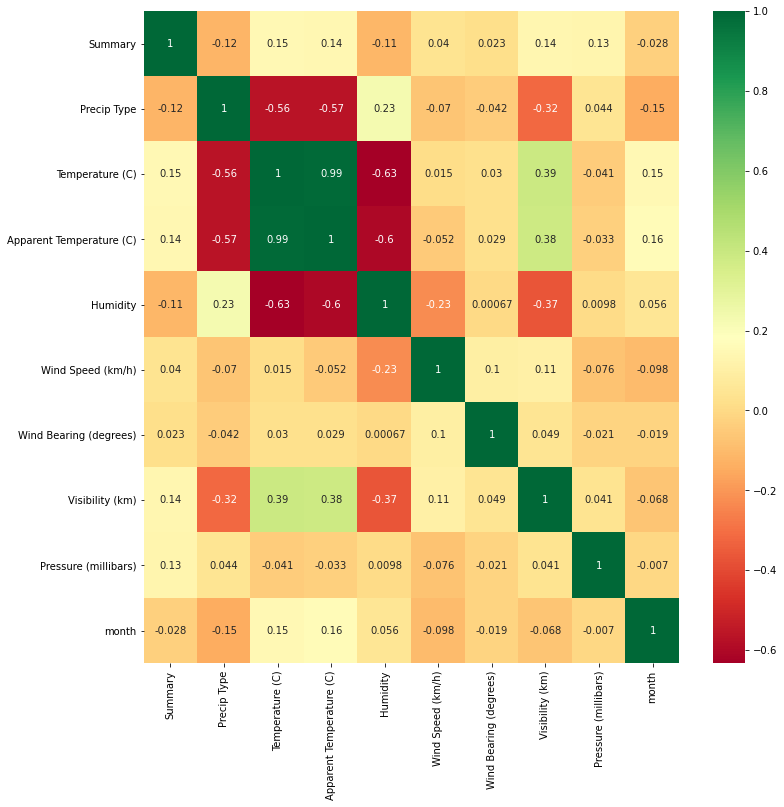

In [80]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")

In [81]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,3
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4


In [82]:
##Removing correlated features
Threshold=0.9 

In [83]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [84]:
correlation(x,Threshold)

set()

##### Feature_importance_

In [85]:
#Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [86]:
print(selection.feature_importances_)

[4.20532175e-05 2.36089932e-01 6.61851147e-01 6.53721075e-02
 6.32605618e-03 2.09133522e-05 9.73232822e-03 5.04899006e-05
 2.05149719e-02]


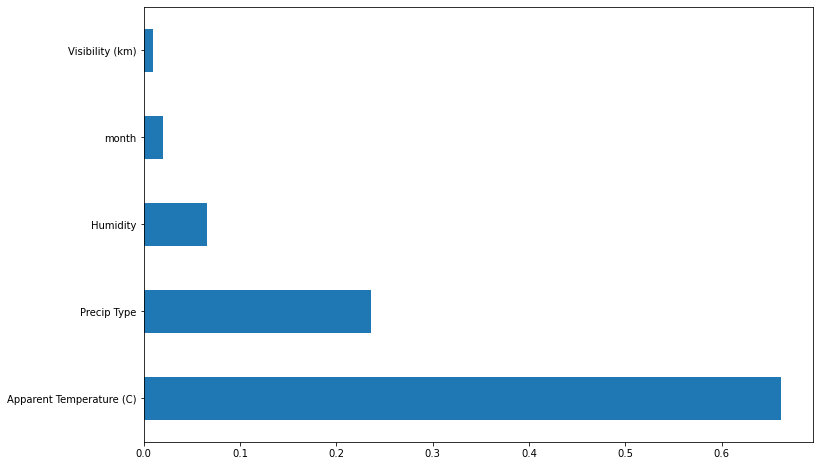

In [87]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity', ylabel='Temperature (C)'>

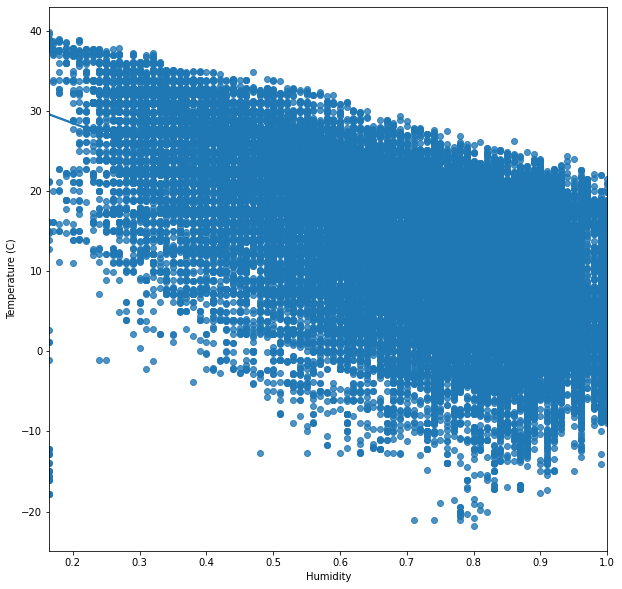

In [88]:
# plotting a scatter plot between temp and humdity ---> to see effect of Humidity on Temperature
plt.figure(figsize=(10,10))
sns.regplot(df["Humidity"],df["Temperature (C)"])

## Fitting model using Linear Regression

1. Split dataset into train and test set in order to prediction w.r.t x_test
2. Feature scalling----->StandardScaler
3. Import model
4. Fit the data
5. Predict w.r.t X_test
4. In regression check RSME Score
5. Plot graph

In [89]:
# split the data in train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Feature scaling 
##### Standardization(Why standardization?)

Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [90]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,3
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4


As we can see the above table, we could say that there is range difference between our numerical features, we need to do feature scalling before building the machine learning regression model

In [91]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler()
### fit vs fit_transform
x_train_scaled=scaler.fit_transform(x_train)
x_train_scaled

array([[ 0.22509039, -0.35350897,  1.1038183 , ...,  1.36380732,
         0.25878344,  1.01498038],
       [ 0.45495225, -0.35350897, -1.01450819, ..., -0.4873861 ,
         0.44566635, -1.59912317],
       [ 0.22509039, -0.35350897, -0.46341151, ..., -0.09318625,
         0.08157503, -0.43729937],
       ...,
       [ 0.22509039, -0.35350897,  0.24943698, ..., -0.08159214,
         0.06552953,  1.01498038],
       [ 0.45495225, -0.35350897,  0.62841316, ..., -0.80042716,
        -0.33183261,  0.72452443],
       [-2.99297555, -0.35350897, -1.29290793, ..., -0.02748628,
         0.18374713,  1.30543633]])

In [93]:
#Transform on x_test
x_test_scaled=scaler.transform(x_test)
x_test_scaled

array([[ 0.45495225, -0.35350897,  0.58693834, ..., -1.17916819,
         0.22338895,  0.43406848],
       [-2.30338999, -0.35350897,  1.31948737, ..., -0.09318625,
         0.11956512,  0.14361253],
       [ 0.6848141 , -0.35350897,  0.01925172, ..., -1.0091212 ,
         0.0188088 ,  1.30543633],
       ...,
       [ 0.22509039, -0.35350897,  0.59782548, ...,  0.25850185,
         0.0997442 , -0.43729937],
       [ 0.6848141 , -0.35350897,  1.42835877, ..., -0.09318625,
         0.01078605,  0.14361253],
       [ 0.45495225, -0.35350897,  0.52731828, ..., -0.74245659,
         0.10847484,  0.43406848]])

#### Build the Linear Regression Model

In [94]:
# import library
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train_scaled,y_train)

LinearRegression()

#### Predict the model 

In [95]:
y_pred=reg.predict(x_test_scaled)


In [96]:
#RMSE error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.9455942746556567


In [97]:
#R^2 error
print(reg.score(x_test_scaled,y_test))
print(reg.score(x_train_scaled,y_train))

0.9902256418663465
0.9902727785906056


C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


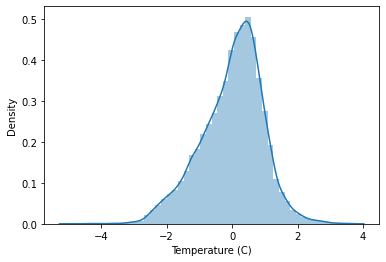

In [98]:
sns.distplot(y_test-y_pred)
plt.show()

We can see above graph of error=(y_test-y_pred), which is normal distributed 

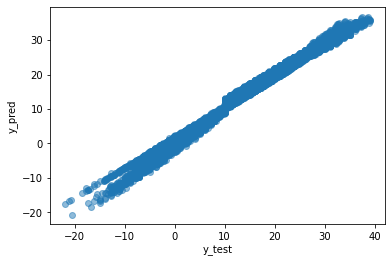

In [99]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Statistical Model

In [100]:
# Import library
import statsmodels.api as sm

#adding constant term
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [101]:
# converting into dataframe
x_train_d=pd.DataFrame(x_train)

### Building the stats model

In [102]:
model_train=sm.OLS(y_train,x_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.595e+05
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:51:34   Log-Likelihood:                -91430.
No. Observations:               67155   AIC:                         1.829e+05
Df Residuals:                   67145   BIC:                         1.830e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3634      0.093     36.065      0.000       3.181       3.546
Summary                      0.0034      0.001      3.925      0.000       0.002       0.005
Precip Type                  0.0915      0.015      6.211      0.000       0.063       0.120
Apparent Temperature (C)     0.8738      0.001   1592.738      0.000       0.873       0.875
Humidity                    -1.3916      0.026    -53.454      0.000      -1.443      -1.341
Wind Speed (km/h)            0.0875      0.001    141.785      0.000       0.086       0.089
Wind Bearing (degrees)      -0.0004   3.42e-05    -11.087      0.000      -0.000      -0.000
Visibility (km)              0.0089      0.001      9.001      0.000       0.007       0.011
Pressure (millibars)        -0.0009   8.73e-05    -10.729      0.000      -0.001      -0.001
month                        0.0061      0.001      5.551      0.000       0.004       0.008
==============================================================================
Omnibus:                     2003.134   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2280.325
Skew:                          -0.400   Prob(JB):                         0.00
Kurtosis:                       3.418   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
#checking for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(x_train_d.values, j) for j in range(x_train_d.shape[1])]
vif["features"] = x_train_d.columns
vif.round(1)

,VIF Factor,features
0,655.1,const
1,1.1,Summary
2,1.6,Precip Type
3,2.6,Apparent Temperature (C)
4,2.0,Humidity
5,1.2,Wind Speed (km/h)
6,1.0,Wind Bearing (degrees)
7,1.3,Visibility (km)
8,1.0,Pressure (millibars)
9,1.1,month


In [104]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,3
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4
